# Requirements #

* clone HalphaImaging repository
* assuming github repositories are in : ~/github/
* galfit
* swarp



# Modeling WISE Images with GALFIT #


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from astropy.table import Table
from astropy.wcs import WCS

In [2]:
homedir = os.getenv("HOME")

# Setting up path and names for Virgo Catalogs #

- set the table dir to point to the Virgo directory where you are storing the tables
- the table prefix is set to 'vf_north_v0_'.  You might need to update this as the table versions are updated.

In [3]:
tabledir = homedir+'/research/Virgo/tables-north/v0/'
tableprefix = 'vf_north_v0_'

# Read in Virgo Catalogs #

- we will need the main file
- and maybe unwise table?

In [4]:
vfmain = Table.read(tabledir+tableprefix+'main.fits')
vfunwise = Table.read(tabledir+tableprefix+'main_unwise.fits')
vfz0mgs = Table.read(tabledir+tableprefix+'z0mgs.fits')

In [5]:
vfmain

VFID,RA,DEC,vr,radius,radius_flag,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,name
,,,,arcsec,,,,,,,,,,,,,,,,,,
bytes8,float32,float32,float32,float32,bool,bytes28,int32,int32,int64,bytes30,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bytes38,bytes8
VFID0000,185.86877,74.95225,1418.8,23.829847,True,NGC4363,0,0,0,NGC 4363,True,False,False,False,False,False,False,True,False,False,VFID0000-NGC4363,VFID0000
VFID0001,182.208,74.904274,1331.5,49.6731,True,NGC4133,0,0,0,NGC 4133,True,False,False,False,False,False,False,True,True,False,VFID0001-NGC4133,VFID0001
VFID0002,145.94466,74.85958,3049.4,62.3909,True,NGC2977,0,0,0,NGC 2977,True,False,False,False,False,False,False,True,True,False,VFID0002-NGC2977,VFID0002
VFID0003,185.57309,74.83839,1833.0,26.128908,True,PGC040048,0,0,0,CGCG 352-030,True,False,False,False,False,False,False,True,False,False,VFID0003-CGCG352-030,VFID0003
VFID0004,182.82774,74.80822,1683.0,40.937492,True,UGC07189,0,0,0,UGC 07189,True,False,False,False,False,False,False,True,False,False,VFID0004-UGC07189,VFID0004
VFID0005,173.13419,74.62754,1920.1,48.654305,True,NGC3752,0,0,0,NGC 3752,True,False,False,False,False,False,False,True,True,True,VFID0005-NGC3752,VFID0005
VFID0006,121.91241,74.58463,2333.0,26.984928,True,UGC04202,0,0,0,UGC 04202,True,False,False,False,False,False,False,True,True,False,VFID0006-UGC04202,VFID0006
VFID0007,118.2363,74.57653,2346.0,23.448833,True,PGC022064,0,0,0,KUG 0746+747,True,False,False,False,False,False,False,True,False,False,VFID0007-KUG0746+747,VFID0007


In [6]:
vfunwise

VFID_1,RA_1,DEC_1,vr_1,objname_1,NSAID_1,AGC_1,NEDname_1,HLflag_1,NSAflag_1,A100flag_1,COflag,Z0MGSflag,Steerflag,objid,ra_2,dec_2,run,camcol,field,raerr,decerr,pointsource,treated_as_pointsource,x,y,coadd_id,w1_nanomaggies,w1_nanomaggies_ivar,w1_mag,w1_mag_err,w1_prochi2,w1_pronpix,w1_profracflux,w1_proflux,w1_npix,w1_pronexp,w2_nanomaggies,w2_nanomaggies_ivar,w2_mag,w2_mag_err,w2_prochi2,w2_pronpix,w2_profracflux,w2_proflux,w2_npix,w2_pronexp,w3_nanomaggies,w3_nanomaggies_ivar,w3_mag,w3_mag_err,w3_prochi2,w3_pronpix,w3_profracflux,w3_proflux,w3_npix,w3_pronexp,w4_nanomaggies,w4_nanomaggies_ivar,w4_mag,w4_mag_err,w4_prochi2,w4_pronpix,w4_profracflux,w4_proflux,w4_npix,w4_pronexp,vfid_2,vr_2,objname_2,nsaid_2,agc_2,nedname_2,hlflag_2,nsaflag_2,a100flag_2,vf_index,ra_vf,dec_vf,GroupID,GroupSize,Separation
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec
bytes8,float32,float32,float32,bytes28,int32,int64,bytes30,bool,bool,bool,bool,bool,bool,bytes19,float64,float64,int16,uint8,int16,float64,float64,uint8,uint8,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,bytes28,int32,int64,bytes25,bool,bool,bool,int64,float32,float32,int32,int32,float64
VFID0000,185.86877,74.95225,1418.8,NGC4363,0,0,NGC 4363,True,False,False,False,True,False,,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,,--,--,,False,False,False,--,nan,nan,--,--,nan
VFID0001,182.208,74.904274,1331.5,NGC4133,0,0,NGC 4133,True,False,False,False,True,True,,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,,--,--,,False,False,False,--,nan,nan,--,--,nan
VFID0002,145.94466,74.85958,3049.4,NGC2977,0,0,NGC 2977,True,False,False,False,True,True,,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,,--,--,,False,False,False,--,nan,nan,--,--,nan
VFID0003,185.57309,74.83839,1833.0,PGC040048,0,0,CGCG 352-030,True,False,False,False,True,False,,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,,--,--,,False,False,False,--,nan,nan,--,--,nan
VFID0004,182.82774,74.80822,1683.0,UGC07189,0,0,UGC 07189,True,False,False,False,True,False,,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,,--,--,,False,False,False,--,nan,nan,--,--,nan
VFID0005,173.13419,74.62754,1920.1,NGC3752,0,0,NGC 3752,True,False,False,False,True,True,1237671686936461455,173.1344112368449,74.62730659917023,6103,4,104,0.023551183309488816,0.016304703581321363,0,0,1570.8195,1579.9753,1747p742,91223.164,0.00043761247,10.099737,0.0005689503,339.42264,0.9505868,0.00036290142,33.105,1994.0,42.865833,95767.32,4.9953782e-05,10.046957,0.0016040679,48.08065,0.9238895,0.00038721002,37.082092,1243.0,42.263596,2126363.0,2.2450859e-08,6.6809063,0.0034077712,15.556739,0.87820596,0.00037191898,790.835,1437.0,24.805756,8856857.0,4.747948e-11,5.131801,0.017790647,2.4220376,0.95292103,0.00038766276,3433.4734,1185.0,21.806858,2589,1920.1,NGC3752,0,0,NGC 3752,True,False,False,2589,173.13419,74.62754,--,--,0.8694036742732427
VFID0006,12

# Select Sample for WISE Analysis #

- probably should start with a sample of 10 galaxies
- select those with high W3 SNR

# Example Galaxy #

I am going to take one galaxy as an example: NGC4363.  This is the first galaxy in our catalog!

In [7]:
vfindex = np.arange(len(vfmain))[vfmain['objname'] == 'NGC6015']
print(vfindex)

[388]


I am going to store the RA, DEC and size as new variables just for clarity.  In practice, you could just pass in the variable directly from the table, like vmain['RA'][vfindex] instead of ra.

In [8]:
ra = vfmain['RA'][vfindex][0]
dec = vfmain['DEC'][vfindex][0]
size = vfmain['radius'][vfindex][0]
galname = vfmain['prefix'][vfindex][0]

In [9]:
print(dec)

62.310036


# Load wisesize code #

- set the current directory to someplace where you want to store images and galfit output

In [10]:
os.chdir(homedir+'/research/Virgo/wisesize/test/')

In [11]:
%run ~/github/virgowise/wisesize.py

set up one galaxy

In [12]:
g = galaxy(ra, dec, size,name=galname,band='3')

In [13]:
t = g.get_wise_image()

wise image size =  348
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=237.85522&dec=62.31004&size=348&bands=3
['unwise-2368p620-w3-img-m.fits', 'unwise-2368p620-w3-invvar-m.fits.gz', 'unwise-2368p620-w3-n-m.fits.gz', 'unwise-2368p620-w3-std-m.fits.gz']
(348, 348)


In [14]:
g.ximagesize

348

## Display the unwise image ##

* you don't need to do this every time b/c it will show you the galfit results at the end
* just doing it so we can see what we are working with

Text(0, 0.5, 'DEC')

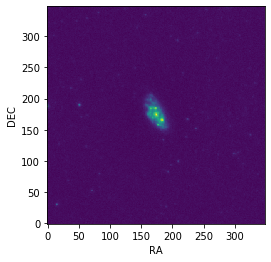

In [35]:
wimage,wheader = fits.getdata(g.image,header=True)
wcs = WCS(wheader)
plt.figure()
#plt.subplot(projection=wcs)
plt.imshow(wimage,origin='lower')
plt.xlabel('RA')
plt.ylabel('DEC')

In [48]:
g.set_image_names()

In [49]:
g.getpix()

In [50]:
g.initialize_galfit(convflag=False)

self.psfimage =  /home/rfinn/github/virgowise/wise_psfs/wise-w3-psf-wpro-09x09-05x05.fits


In [51]:
g.set_sersic_manual(n=2,m=10,re=10,BA=1,PA=10)

In [52]:
g.run_galfit_wise(fitBA=1,fitPA=1)

sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0388-NGC6015-unwise-w3-galfit.input.1Comp


In [53]:
g.write_results(printflag=True)

  1_XC : 175.31 +/-  0.01
  1_YC : 174.87 +/-  0.02
 1_MAG :  4.85 +/-  0.00
  1_RE : 17.24 +/-  0.02
   1_N :  0.38 +/-  0.00
  1_AR :  0.47 +/-  0.00
  1_PA : 30.70 +/-  0.07
 2_SKY : -5.07 +/-  0.94
 ERROR :  0.00
CHI2NU :  3.45


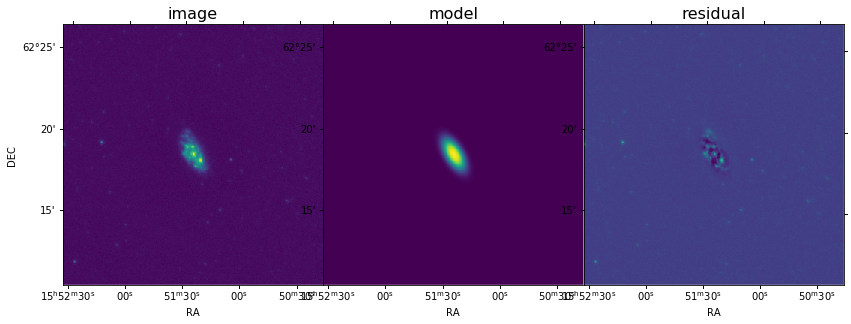

In [54]:
g.display_galfit_model()

# Analyze Galaxy in One Step #

* using a different galaxy for this part - the first in the virgo filaments catalog



In [57]:
ra = vfmain['RA'][0]
dec = vfmain['DEC'][0]
size = vfmain['radius'][0]
galname = vfmain['prefix'][0]

In [58]:
print(ra,dec,size,galname)

185.86877 74.95225 23.829847 VFID0000-NGC4363


wise image size =  47
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=185.86877&dec=74.95225&size=47&bands=3
['unwise-1853p742-w3-img-m.fits', 'unwise-1853p742-w3-invvar-m.fits.gz', 'unwise-1853p742-w3-n-m.fits.gz', 'unwise-1853p742-w3-std-m.fits.gz', 'unwise-1858p757-w3-img-m.fits', 'unwise-1858p757-w3-invvar-m.fits.gz', 'unwise-1858p757-w3-n-m.fits.gz', 'unwise-1858p757-w3-std-m.fits.gz']
running swarp to combine multiple unwise images
self.psfimage =  /home/rfinn/github/virgowise/wise_psfs/wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0000-NGC4363-unwise-w3-galfit.input.1Comp
  1_XC : 24.99 +/-  0.05
  1_YC : 25.48 +/-  0.07
 1_MAG :  9.11 +/-  0.01
  1_RE :  5.30 +/-  0.08
   1_N :  0.46 +/-  0.02
  1_AR :  0.67 +/-  0.01
  1_PA :  9.68 +/-  1.45
 2_SKY : -16.86 +/-  5.02
 ERROR :  0.00
CHI2NU :  0.59


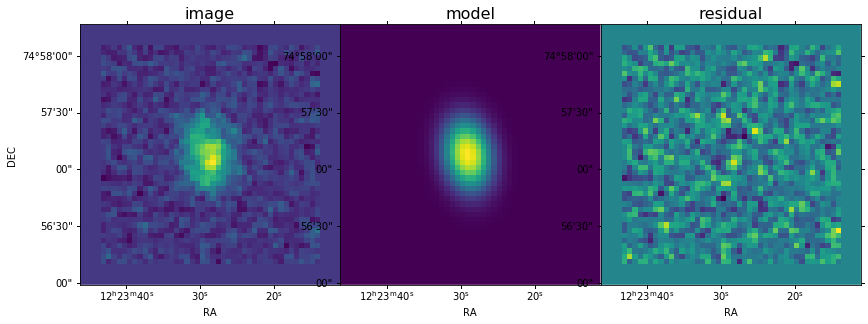

In [24]:
os.chdir(homedir+'/research/Virgo/wisesize/test/')
%run ~/github/virgowise/wisesize.py
g = galaxy(ra, dec, size,name=galname,band='3')
g.run_simple(convflag=False)

### Still To Do:
* check if image already exists
* get convolution working
* masking
  - get list of gaia sources and mask thoses
  - will probably also need to edit mask by hand; run source extractor and then edit the mask that source extractor creates

### Already Done:

* combine images if multiple are returned
* add psf images to github repository
* finish running for one galaxy!


# Testing Display Parameters with NGC 3945 #

In [15]:
vfindex = np.arange(len(vfmain))[vfmain['objname'] == 'NGC6015']
print(vfindex)
ra = vfmain['RA'][vfindex][0]
dec = vfmain['DEC'][vfindex][0]
size = vfmain['radius'][vfindex][0]
galname = vfmain['prefix'][vfindex][0]

[388]


wise image size =  348
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=237.85522&dec=62.31004&size=348&bands=3
['unwise-2368p620-w3-img-m.fits', 'unwise-2368p620-w3-invvar-m.fits.gz', 'unwise-2368p620-w3-n-m.fits.gz', 'unwise-2368p620-w3-std-m.fits.gz']
(348, 348)
self.psfimage =  /home/rfinn/github/virgowise/wise_psfs/wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0388-NGC6015-unwise-w3-galfit.input.1Comp
  1_XC : 175.31 +/-  0.01
  1_YC : 174.87 +/-  0.02
 1_MAG :  4.85 +/-  0.00
  1_RE : 17.24 +/-  0.02
   1_N :  0.38 +/-  0.00
  1_AR :  0.47 +/-  0.00
  1_PA : 30.70 +/-  0.07
 2_SKY : -5.07 +/-  0.94
 ERROR :  0.00
CHI2NU :  3.45


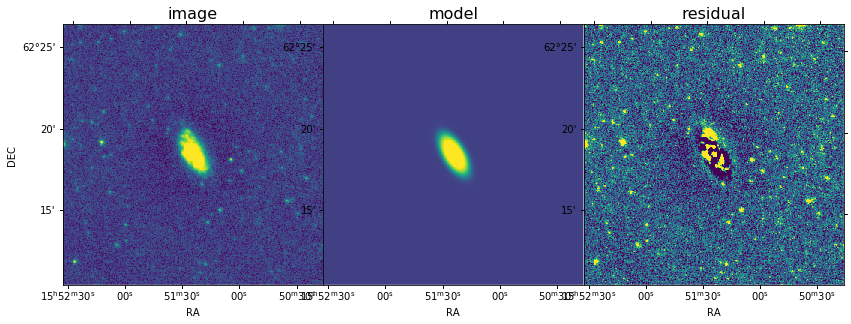

In [46]:
os.chdir(homedir+'/research/Virgo/wisesize/test/')
%run ~/github/virgowise/wisesize.py
g = galaxy(ra, dec, size,name=galname,band='3')
g.run_simple(convflag=False)

## Change the image stretch and zoom ##

Optional arguments for display_galfit_model:
* percentile1 = min percentile for stretch of image and model (default=0.5)
* percentile2 = max percentile for stretch of image and model (default=99.5)
* p1residual = min percentile for stretch of residual (default=5)
* p2residual = max percentile for stretch of residual (default=99)
* zoom = factor to zoom image display by

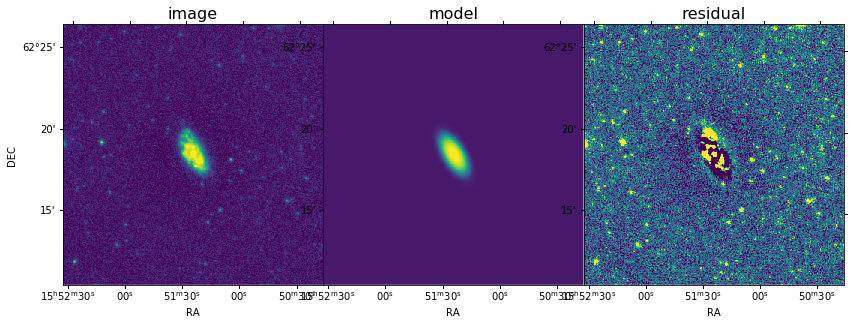

In [47]:
g.display_galfit_model(percentile1=5,percentile2=99.9)

### Example using zoom

who's zoomin' who?


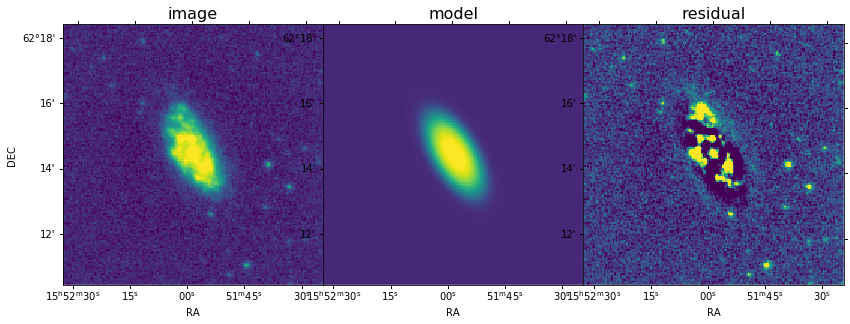

In [51]:
g.display_galfit_model(zoom=2)